# Problem 1

## Setup

In [1]:
import sys
sys.path.append("../src")

import numpy as np
from nat2324.problems import Objective
from nat2324.algorithms import SwarmOptimization
from nat2324.utils import (
    run_optimization_experiment,
    visualize_optimization_experiments,
    visualize_objectives_3d,
)

%load_ext autoreload
%autoreload 2

In [2]:
# Initialize all the possible objectives with maximization task
SPHERE = Objective(function_type="sphere", is_maximization=True)
ROSENBROCK = Objective(function_type="rosenbrock", is_maximization=True)
ACKLEY = Objective(function_type="ackley", is_maximization=True)
RASTRIGIN = Objective(function_type="rastrigin", is_maximization=True)
GRIEWANK = Objective(function_type="griewank", is_maximization=True)
SCHWEFEL = Objective(function_type="schwefel", is_maximization=True)

# Create a dictionary of objectives and their default bounds
OBJECTIVES = {
    "Sphere": (SPHERE, SPHERE.bounds),
    "Griewank": (GRIEWANK, GRIEWANK.bounds),
    "Ackley": (ACKLEY, ACKLEY.bounds),
    "Rosenbrock": (ROSENBROCK, ROSENBROCK.bounds),
    "Rastrigin": (RASTRIGIN, RASTRIGIN.bounds),
    "Schwefel": (SCHWEFEL, SCHWEFEL.bounds),
}

In [3]:
# Fix the problem difficulty
NUM_EVALUATIONS = 5000
OBJECTIVE = RASTRIGIN
DIMENSION = 25

## Question (a)

### Particle Swarm Optimization

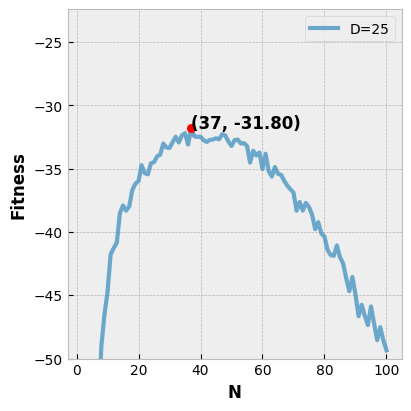

In [4]:
# Setup variable params
experiment_setup = {
    'N': range(100, 1, -1),
}

# Setup static params
default_kwargs = {
    "fitness_fn": OBJECTIVE,
    "bounds": OBJECTIVE.bounds,
    "num_evaluations": NUM_EVALUATIONS,
    "D": DIMENSION,
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    num_runs=500,
    dirname="../experiments/problem1/runs",
)

# Visualize the experiment results
visualize_optimization_experiments(
    xs=experiment_setup,
    ys={"Fitness": results['N']},
    curve_labels=f"D={DIMENSION}",
    is_maximization=True,
    ylim=(-50, None),
    filepath="../experiments/problem1/plots/fitness_vs_n_1.png",
)

### Other Metaheuristic algorithms

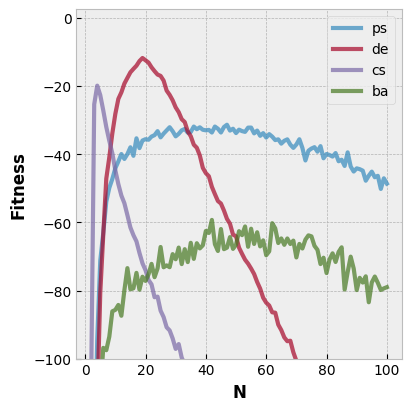

In [5]:
# Setup variable params
experiment_setup = {
    "N": range(100, 1, -1),
    "algorithm_type": ["ps", "de", "cs", "ba"]
}

# Setup static params
default_kwargs = {
    "fitness_fn": OBJECTIVE,
    "bounds": OBJECTIVE.bounds,
    "num_evaluations": NUM_EVALUATIONS,
    "D": DIMENSION,
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    num_runs=100,
    dirname="../experiments/problem1/runs",
)

# Visualize the experiment results
visualize_optimization_experiments(
    xs={'N': experiment_setup['N']},
    ys={"Fitness": results[('N', "algorithm_type")][..., 0]},
    curve_labels=experiment_setup["algorithm_type"],
    ylim=(-100, None),
    filepath="../experiments/problem1/plots/fitness_vs_n_2.png",
)

## Question (b)

### Varying Space Dimension

In [6]:
# Setup variable params
experiment_setup = {
    "N": np.arange(150, 0, -3),
    "D": np.arange(1, 101, 2),
}

# Setup static params
default_kwargs = {
    "fitness_fn": OBJECTIVE,
    "bounds": OBJECTIVE.bounds,
    "num_evaluations": NUM_EVALUATIONS,
    "algorithm_type": "ps",
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=200,
    dirname="../experiments/problem1/runs",
)

# Retrieve N, D and score values
ps_n = experiment_setup['N']
ps_d = experiment_setup['D']
ps_s = results[('N', 'D')]

In [7]:
# Setup variable params
experiment_setup = {
    "N": np.arange(50, 0, -1),
    "D": np.arange(1, 101, 2),
}

# Setup static params
default_kwargs = {
    "fitness_fn": OBJECTIVE,
    "bounds": OBJECTIVE.bounds,
    "num_evaluations": NUM_EVALUATIONS,
    "algorithm_type": "de",
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=50, # DE is smoother
    dirname="../experiments/problem1/runs",
)

# Retrieve N, D and score values
de_n = experiment_setup['N']
de_d = experiment_setup['D']
de_s = results[('N', 'D')]

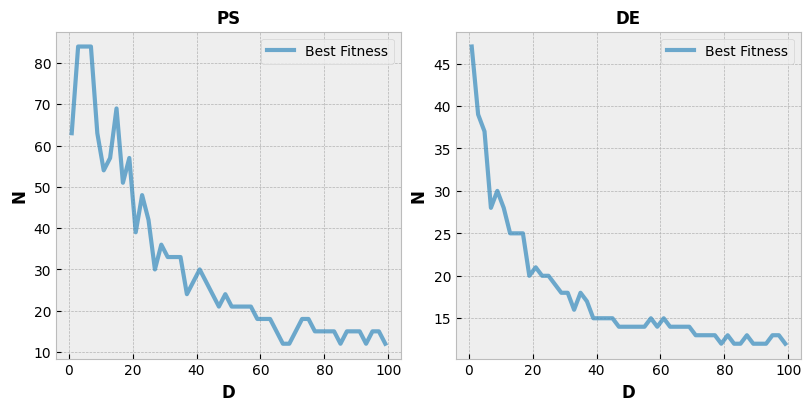

In [8]:
# Visualize optimal N against D
visualize_optimization_experiments(
    xs={"D_PS": ps_d, "D_DE": de_d},
    ys={"PS": ps_n[ps_s.argmax(0)], "DE": de_n[de_s.argmax(0)]},
    curve_labels="Best Fitness",
    labels='N',
    ignore_suffix_x=True,
    filepath="../experiments/problem1/plots/n_vs_d_1.png",
)

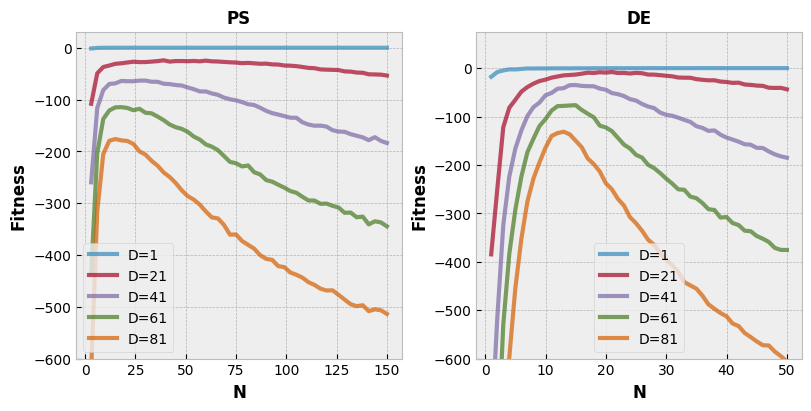

In [9]:
# Visualize fitness vs N for multiple D
visualize_optimization_experiments(
    xs={"N_PS": ps_n, "N_DE": de_n},
    ys={"PS": ps_s[:, ::10, 0], "DE": de_s[:, ::10, 0]},
    curve_labels=[f"D={d}" for d in ps_d[::10]],
    labels="Fitness",
    ylim=(-600, None),
    ignore_suffix_x=True,
    filepath="../experiments/problem1/plots/n_vs_d_2.png",
)

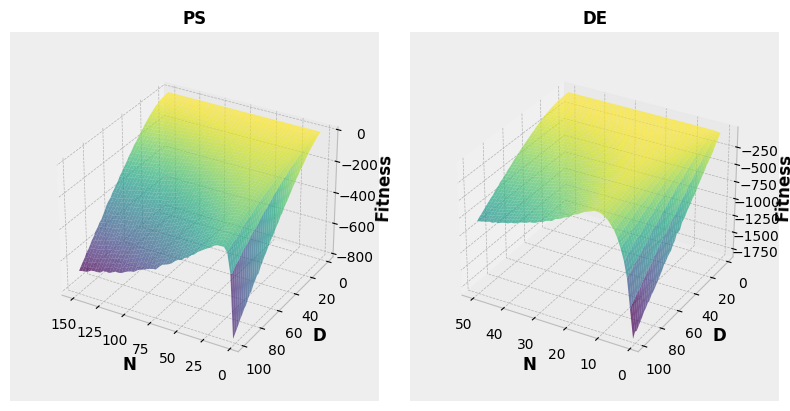

In [10]:
# Visualize fitness vs N vs D (3D plot)
visualize_optimization_experiments(
    xs={'N_PS': ps_n, 'N_DE': de_n},
    ys={'D_PS': ps_d, 'D_DE': de_d},
    zs={"PS": ps_s, "DE": de_s},
    labels="Fitness",
    elev=30,
    azim=120,
    ignore_suffix_x=True,
    ignore_suffix_y=True,
    filepath="../experiments/problem1/plots/n_vs_d_3.png",
)

### Varying Objective

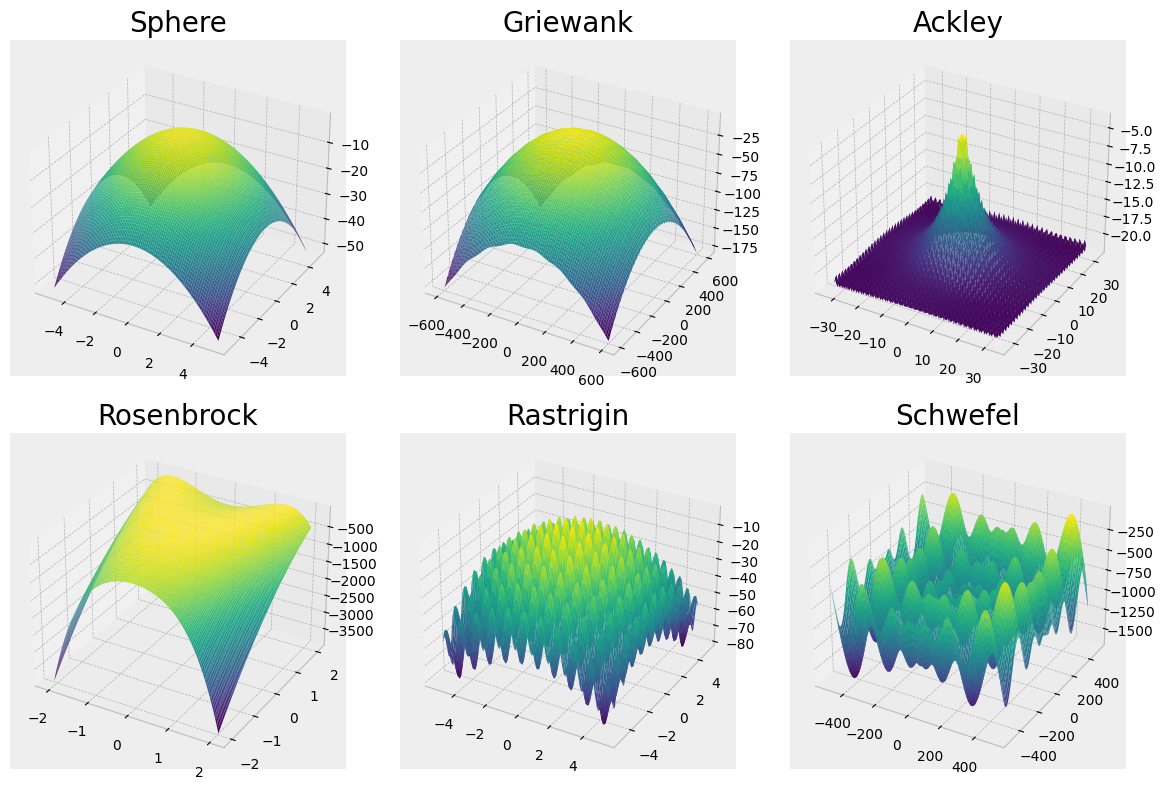

In [11]:
# Visualize objective surfaces
visualize_objectives_3d(
    OBJECTIVES,
    num_points=100,
    max_col=3,
    filepath="../experiments/problem1/plots/objectives.png",
)

In [12]:
# Setup variable params
experiment_setup = {
    'N': range(100, 0, -1),
    ("fitness_fn", "bounds"): OBJECTIVES.values(),
}

# Setup static params
default_kwargs = {
    "num_evaluations": NUM_EVALUATIONS,
    "D": DIMENSION,
    "patience": None,
    
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=200,
    dirname="../experiments/problem1/runs",
)

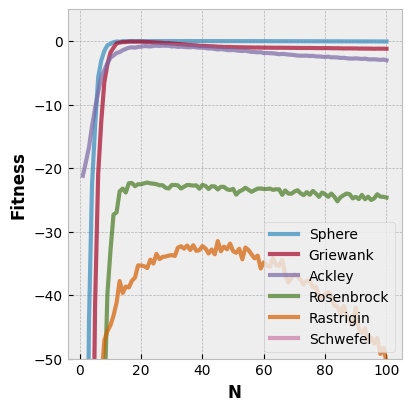

In [13]:
# Visualize the experiment results (fitness >= -50)
visualize_optimization_experiments(
    xs={'N': experiment_setup["N"]},
    ys={"Fitness": results[('N', ("fitness_fn", "bounds"))][..., 0]},
    curve_labels=list(OBJECTIVES.keys()),
    ylim=(-50, 5),
    filepath="../experiments/problem1/plots/n_vs_objective_1.png",
)

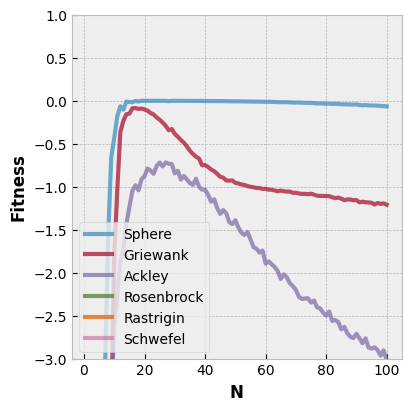

In [14]:
# Visualize the experiment results (fitness >= -3)
visualize_optimization_experiments(
    xs={'N': experiment_setup["N"]},
    ys={"Fitness": results[('N', ("fitness_fn", "bounds"))][..., 0]},
    curve_labels=list(OBJECTIVES.keys()),
    ylim=(-3, 1),
    filepath="../experiments/problem1/plots/n_vs_objective_2.png",
)

In [19]:
# Setup variable params
experiment_setup = {
    'N': np.arange(100, 0, -2),
    'D': np.arange(1, 101, 2),
    ("fitness_fn", "bounds"): OBJECTIVES.values(),
}

# Setup static params
default_kwargs = {
    "num_evaluations": NUM_EVALUATIONS,
    "algorithm_type": "ps",
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=100,
    dirname="../experiments/problem1/runs",
)

# Retrieve N, D and score values
ps_n = experiment_setup['N']
ps_d = experiment_setup['D']
ps_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

In [22]:
# Setup variable params
experiment_setup = {
    'N': np.arange(50, 0, -1),
    'D': np.arange(1, 101, 2),
    ("fitness_fn", "bounds"): OBJECTIVES.values(),
}

# Setup static params
default_kwargs = {
    "num_evaluations": NUM_EVALUATIONS,
    "algorithm_type": "de",
    "patience": None,
}

# Run the experiment based on variable params
results = run_optimization_experiment(
    SwarmOptimization.experiment_callback,
    experiment_setup,
    default_kwargs,
    is_cartesian_product=True,
    chunksize=5,
    num_runs=50,
    dirname="../experiments/problem1/runs",
)

# Retrieve N, D and score values
de_n = experiment_setup['N']
de_d = experiment_setup['D']
de_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

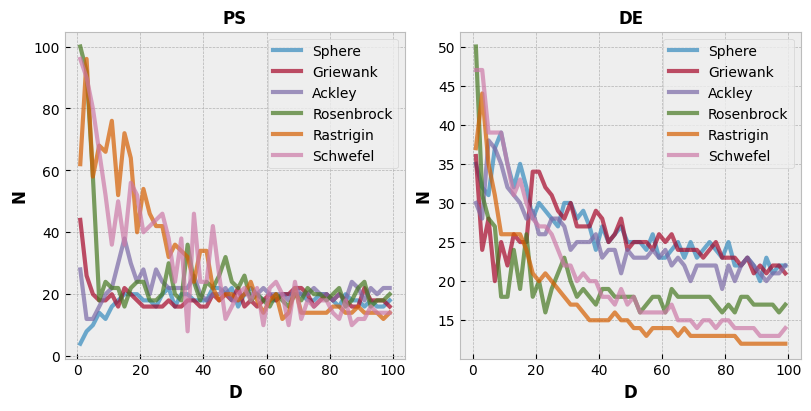

In [25]:
visualize_optimization_experiments(
    xs={"D_PS": ps_d, "D_DE": de_d},
    ys={"PS": ps_n[ps_s.argmax(0)], "DE": de_n[de_s.argmax(0)]},
    curve_labels=list(OBJECTIVES.keys()),
    labels='N',
    ignore_suffix_x=True,
    filepath="../experiments/problem1/plots/n_vs_d_vs_objective.png",
)

## Appendix A

### Helper function

In [26]:
def run_appendix_experiment(
    algorithm_type: str,
    is_high_dim: bool = False,
    n_mult: int = 1,
) -> tuple[dict[tuple[str], np.ndarray], dict[str | tuple[str], np.ndarray]]:
    """Appendix-specific helper function.

    This function runs two types of experiments:

        1. **High-dimensional experiments**, where the experimented
           function is ``FUNCTION_TYPE`` with ``1`` to ``10000``
           dimensions with a step size of ``100``. The population size
           range is ``1`` to ``20``, the number of evaluations is
           ``500``, and the number of runs is ``10`` (small values due 
           to high dimensionality).
        2. **Objective experiments**, where the experimented function is
           varied, i.e., an experiment is performed for each function in
           ``OBJECTIVES`` dictionary. The population size range is
           ``1`` to ``100`` with a step size of ``2``, the dimension
           range is ``1`` to ``100`` with a step size of ``10``, the
           number of evaluations is ``NUM_EVALUATIONS``, and the
           number of runs is ``15``.
    
    Note:
        Please do not focus on the details on this function, it is just
        a very specific helper function for the experiments in this
        appendix.

    Args:
        algorithm_type (str): The type of the algorithm to use. See
            :class:`.SwarmOptimization` for more details.
        is_high_dim (bool, optional): Whether it is a high-dim
            experiment or not. Defaults to ``False``.
        n_mult (int, optional): a multiplier for the population size.
            Defaults to ``1``.

    Returns:
        tuple[dict, dict]: A tuple of 2 dictionaries. The first one is
            the results dictionary, and the second one is the experiment
            setup dictionary.
    """
    if is_high_dim:
        # High dimensional experiment setup
        experiment_setup = {
            'N': np.arange(20 * n_mult, 0, -1 * n_mult),
            'D': np.arange(1, 10101 if algorithm_type == "ps" else 10001, 100),
        }
    else:
        # Objective experiment setup
        experiment_setup = {
            'N': np.arange(100 * n_mult, 0, -2 * n_mult),
            'D': np.arange(1, 101, 10),
            ("fitness_fn", "bounds"): OBJECTIVES.values(),
        }

    # Initialize default kwargs
    default_kwargs = {}

    if is_high_dim:
        # High dimensional experiment kwargs
        default_kwargs.update({
            "fitness_fn": OBJECTIVE,
            "bounds": OBJECTIVE.bounds,
        })

    # Common kwargs for both experiments
    default_kwargs.update({
        "num_evaluations": 500 if is_high_dim else NUM_EVALUATIONS,
        "algorithm_type": algorithm_type,
        "patience": None,
    })
    
    if not is_high_dim:
        # Does nothing, just adds a label
        default_kwargs["n_mult"] = n_mult

    # Run the experiment and get the results
    results = run_optimization_experiment(
        SwarmOptimization.experiment_callback,
        experiment_setup,
        default_kwargs,
        is_cartesian_product=True,
        chunksize=5,
        num_runs=10 if is_high_dim else 15,
        dirname="../experiments/problem1/runs",
    )

    return results, experiment_setup

### High Dimensions

In [27]:
# Run high-dimensionality experiments for PS
results, setup = run_appendix_experiment("ps", is_high_dim=True)
ps_n, ps_d, ps_s = setup['N'], setup['D'], results[('N', 'D')]

In [28]:
# Run high-dimensionality experiments for DE
results, setup = run_appendix_experiment("de", is_high_dim=True)
de_n, de_d, de_s = setup['N'], setup['D'], results[('N', 'D')]

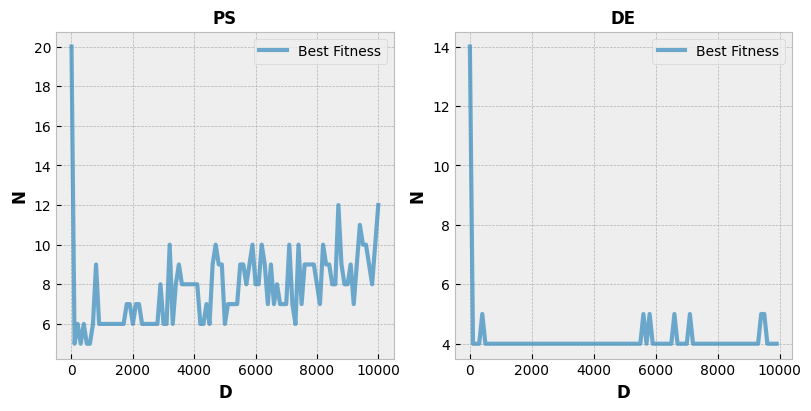

In [30]:
# Visualize optimal N vs high D
visualize_optimization_experiments(
    xs={"D_PS": ps_d, "D_DE": de_d},
    ys={"PS": ps_n[ps_s.argmax(0)], "DE": de_n[de_s.argmax(0)]},
    curve_labels="Best Fitness",
    labels='N',
    ignore_suffix_x=True,
    filepath="../experiments/problem1/plots/n_vs_d_1_high.png",
)

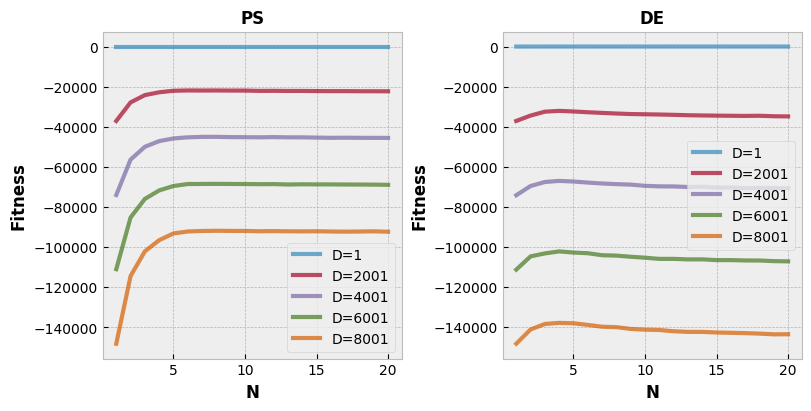

In [31]:
# Visualize fitness vs N for multiple high D
visualize_optimization_experiments(
    xs={"N_PS": ps_n, "N_DE": de_n},
    ys={"PS": ps_s[:, :-1:20, 0], "DE": de_s[:, ::20, 0]},
    curve_labels=[f"D={d}" for d in ps_d[:-1:20]],
    labels="Fitness",
    ignore_suffix_x=True,
    filepath="../experiments/problem1/plots/n_vs_d_2_high.png",
)

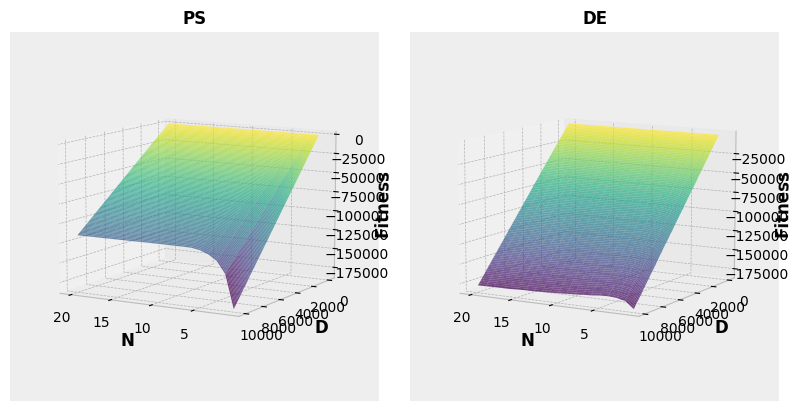

In [32]:
# Visualize fitness vs N vs high D (3D plot)
visualize_optimization_experiments(
    xs={"N_PS": ps_n, "N_DE": de_n},
    ys={"D_PS": ps_d, "D_DE": de_d},
    zs={"PS": ps_s, "DE": de_s},
    labels="Fitness",
    elev=10,
    azim=120,
    ignore_suffix_x=True,
    ignore_suffix_y=True,
    filepath="../experiments/problem1/plots/n_vs_d_3_high.png",
)

### Algorithms vs Objectives vs Dimensions

In [33]:
# Run objective experiments for PS
results, setup = run_appendix_experiment("ps")
ps_n, ps_d = setup['N'], setup['D']
ps_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

In [34]:
# Run objective experiments for DE
results, setup = run_appendix_experiment("de")
de_n, de_d = setup['N'], setup['D']
de_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

In [35]:
# Run objective experiments for CS
results, setup = run_appendix_experiment("cs")
cs_n, cs_d = setup['N'], setup['D']
cs_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

In [36]:
# Run objective experiments for BA
results, setup = run_appendix_experiment("ba")
ba_n, ba_d = setup['N'], setup['D']
ba_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

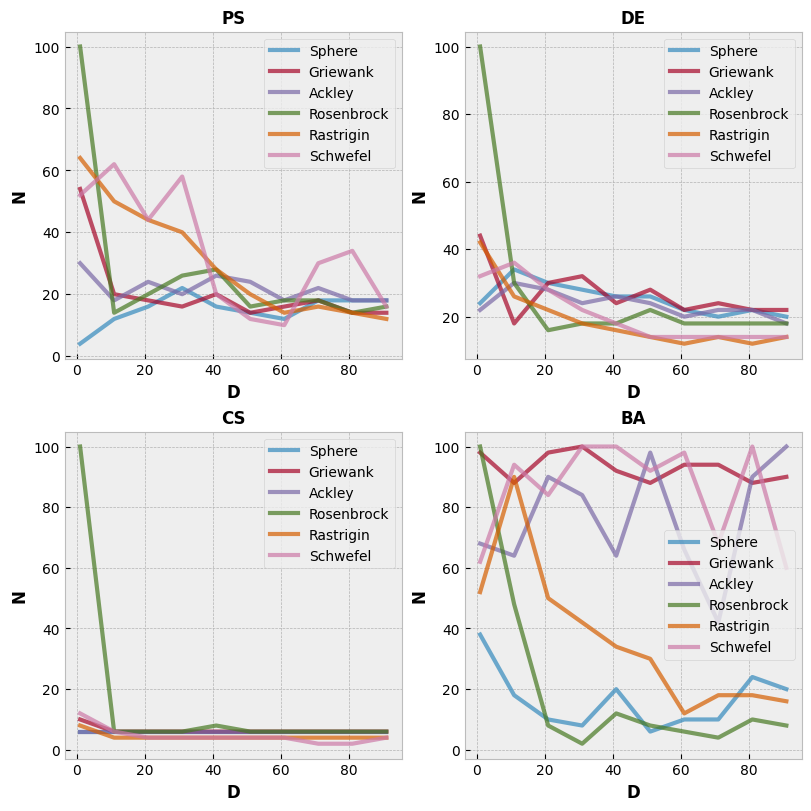

In [37]:
# Visualize optimal N against D for multiple objectives
visualize_optimization_experiments(
    xs={"D_PS": ps_d, "D_DE": de_d, "D_CS": cs_d, "D_BA": ba_d},
    ys={"PS": ps_n[ps_s.argmax(0)], "DE": de_n[de_s.argmax(0)],
        "CS": cs_n[cs_s.argmax(0)], "BA": ba_n[ba_s.argmax(0)]},
    curve_labels=list(OBJECTIVES.keys()),
    labels='N',
    ignore_suffix_x=True,
    max_cols=2,
    filepath="../experiments/problem1/plots/n_vs_d_vs_objective_vs_algorithm.png",
)

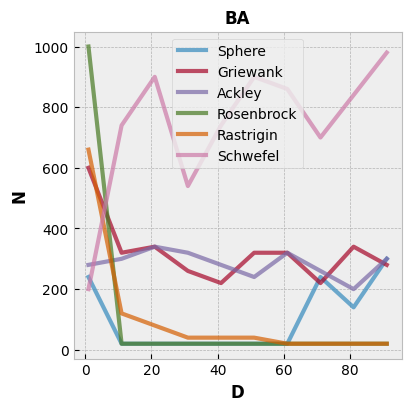

In [38]:
# Run objective experiments for BA with high N
results, setup = run_appendix_experiment("ba", n_mult=10)
ba_n, ba_d = setup['N'], setup['D']
ba_s = results[('N', 'D', ("fitness_fn", "bounds"))][..., 0]

# Visualize optimal N against D for multiple objectives
visualize_optimization_experiments(
    xs={'D': ba_d},
    ys={"BA": ba_n[ba_s.argmax(0)]},
    curve_labels=list(OBJECTIVES.keys()),
    labels='N',
    titles="BA",
    ignore_suffix_x=True,
    max_cols=2,
    filepath="../experiments/problem1/plots/n_vs_d_vs_objective_ba.png",
)